In [ ]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Data/train'
val_path = '/content/drive/MyDrive/Data/valid'
test_path = '/content/drive/MyDrive/Data/test'

In [ ]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'normal': 148, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195} 

 {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'normal': 13} 

 {'squamous.cell.carcinoma': 90, 'normal': 54, 'large.cell.carcinoma': 51, 'adenocarcinoma': 120}


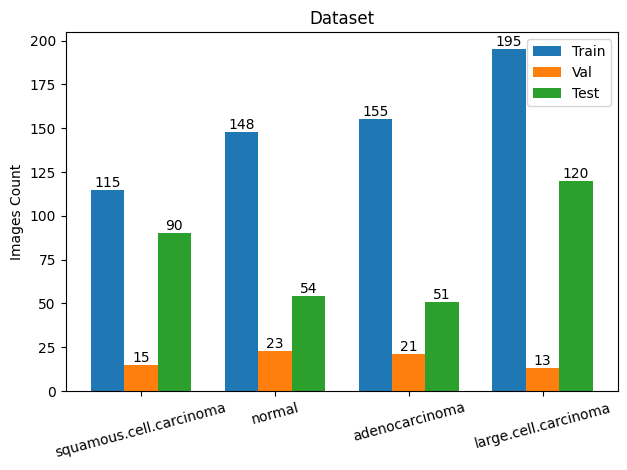

In [ ]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [ ]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
# multiclass classification

In [ ]:
# preprocessing images

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [ ]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

# CNN MODEL

In [ ]:
model = Sequential()

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 173, 173, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 85, 85, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 128)       7

In [ ]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy',
    verbose= 1,
    save_best_only= True,
    mode = 'auto'
    );

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

call_back = [mc,early_stopping];

In [ ]:
# Define hyperparameters for tuning
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32, 64]

best_accuracy = 0
best_hyperparameters = {}

# Hyperparameter tuning loop
for lr in learning_rates:
    for batch_size in batch_sizes:
         # Fitting the Model
          cnn = model.fit(
                     train_data,
                     steps_per_epoch = train_data.samples//train_data.batch_size,
                     epochs = 20,
                     validation_data = val_data,
                     validation_steps = val_data.samples//val_data.batch_size,
                     callbacks = call_back
                  )
         _, accuracy = model.evaluate(test_data)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameters = {'learning_rate': lr, 'batch_size': batch_size}

Epoch 1/20
122/122 [==============================] - ETA: 0s - loss: 1.3430 - accuracy: 0.3322
Epoch 1: val_accuracy improved from -inf to 0.38571, saving model to ./ct_cnn_best_model.hdf5
122/122 [==============================] - 374s 3s/step - loss: 1.3430 - accuracy: 0.3322 - val_loss: 1.1457 - val_accuracy: 0.3857
Epoch 2/20
122/122 [==============================] - ETA: 0s - loss: 1.2783 - accuracy: 0.3931
Epoch 2: val_accuracy did not improve from 0.38571
122/122 [==============================] - 382s 3s/step - loss: 1.2783 - accuracy: 0.3931 - val_loss: 1.3753 - val_accuracy: 0.3143
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 1.3248 - accuracy: 0.3635
Epoch 3: val_accuracy improved from 0.38571 to 0.42857, saving model to ./ct_cnn_best_model.hdf5
122/122 [==============================] - 367s 3s/step - loss: 1.3248 - accuracy: 0.3635 - val_loss: 1.1872 - val_accuracy: 0.4286
Epoch 4/20
122/122 [==============================] - ETA: 0s - loss: 1.23

In [ ]:
# Loading the Best Fit Model
model = load_model("./ct_cnn_best_model.hdf5")

In [ ]:
# Checking the Accuracy of the Model
accuracy_cnn = model.evaluate_generator(generator= test_data)[1]
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 54.603177309036255 %


In [ ]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

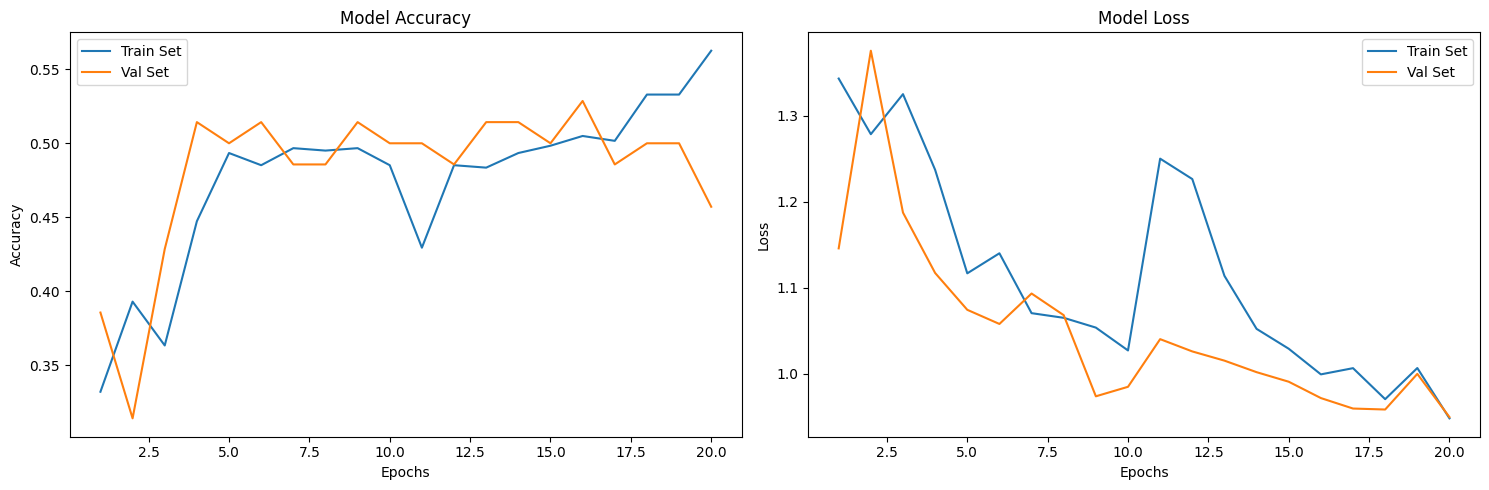

In [ ]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:

# Extract features using CNN
train_features = model.predict(train_data)
val_features = model.predict(val_data)
test_features = model.predict(test_data)


63/63 [==============================] - 44s 700ms/step


In [ ]:
# Flatten the features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
val_features_flat = val_features.reshape(val_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

In [ ]:
# Define and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_flat, train_data.classes)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate Random Forest Classifier
rf_train_accuracy = rf_classifier.score(train_features_flat, train_data.classes)
rf_val_accuracy = rf_classifier.score(val_features_flat, val_data.classes)
rf_test_accuracy = rf_classifier.score(test_features_flat, test_data.classes)

In [ ]:

print("Random Forest Classifier:")
print(f"Train Accuracy: {rf_train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {rf_val_accuracy*100:.2f}%")
print(f"Test Accuracy: {rf_test_accuracy*100:.2f}%")

Random Forest Classifier:
Train Accuracy: 99.67%
Validation Accuracy: 15.28%
Test Accuracy: 23.81%


In [ ]:

# Define and train Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(train_features_flat, train_data.classes)

# Evaluate Support Vector Machine (SVM)
svm_train_accuracy = svm_classifier.score(train_features_flat, train_data.classes)
svm_val_accuracy = svm_classifier.score(val_features_flat, val_data.classes)
svm_test_accuracy = svm_classifier.score(test_features_flat, test_data.classes)

In [ ]:

print("\nSupport Vector Machine (SVM):")
print(f"Train Accuracy: {svm_train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {svm_val_accuracy*100:.2f}%")
print(f"Test Accuracy: {svm_test_accuracy*100:.2f}%")


Support Vector Machine (SVM):
Train Accuracy: 31.81%
Validation Accuracy: 31.94%
Test Accuracy: 38.10%


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define and train Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(train_features_flat, train_data.classes)

# Evaluate Logistic Regression
logistic_train_accuracy = logistic_classifier.score(train_features_flat, train_data.classes)
logistic_val_accuracy = logistic_classifier.score(val_features_flat, val_data.classes)
logistic_test_accuracy = logistic_classifier.score(test_features_flat, test_data.classes)

print("\nLogistic Regression:")
print(f"Train Accuracy: {logistic_train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {logistic_val_accuracy*100:.2f}%")
print(f"Test Accuracy: {logistic_test_accuracy*100:.2f}%")



Logistic Regression:
Train Accuracy: 31.97%
Validation Accuracy: 31.94%
Test Accuracy: 38.10%
